In [1]:
import pandas as pd

In [2]:
infile = pd.read_excel("tsp1.xlsx")

In [3]:
boylam = infile['Boylam'].values.tolist()
enlem = infile['Enlem'].values.tolist()
count = 0
while (count < len(boylam)):
    print (boylam[count])
    count = count + 1
    print (count)

26.186666666666667
1
24.080833333333334
2
22.799722222222226
3
24.394444444444446
4
24.315
5
25.629166666666666
6
24.853055555555557
7
25.661944444444444
8
26.00777777777778
9
26.553333333333335
10
26.58111111111111
11
27.354444444444447
12
26.69527777777778
13
26.398611111111112
14
26.36861111111111
15
26.148333333333333
16
25.47694444444444
17
24.568055555555556
18
24.204166666666666
19
23.272222222222222
20
23.715555555555554
21
24.92027777777778
22
24.754722222222224
23
25.084166666666665
24
26.02777777777778
25
27.326666666666668
26
26.892777777777777
27
25.898333333333333
28
25.68305555555556
29
25.349166666666665
30
25.682222222222222
31


In [4]:
import networkx as nx

n = 31                                   # number of cities
G = nx.complete_graph(n, nx.DiGraph())  # *directed* graph with a vertex for each city

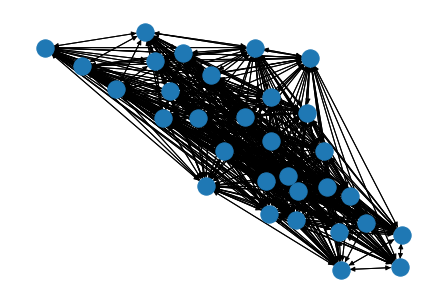

In [5]:
my_pos = { i : ( boylam[i], enlem[i] ) for i in G.nodes } # pos[i] = (x_i, y_i)
nx.draw(G, pos=my_pos)

In [6]:
# for convenience, suppose that distances are Euclidean
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

n = G.number_of_nodes()

c = dict()

for i in range(n):
    for j in range(n):
        (x1,y1) = my_pos[i]
        (x2,y2) = my_pos[j]
        c[i,j] = eucl_dist(x1,y1,x2,y2)

In [7]:
import gurobipy as gp
from gurobipy import GRB

In [8]:
# Solve Dantzig's 3-D assignment problem

m = gp.Model()
x = m.addVars(n, n, n, vtype=GRB.BINARY)

m.setObjective( gp.quicksum( c[i,j] * x[i,j,t] for i in range(n) for j in range(n) for t in range(n) ), GRB.MINIMIZE )

# Dantzig's constraints
m.addConstrs( gp.quicksum( x[i,j,t] for i in range(n) for j in range(n) ) == 1 for t in range(n) )
m.addConstrs( gp.quicksum( x[i,j,t] for i in range(n) for t in range(n) ) == 1 for j in range(n) )
m.addConstrs( gp.quicksum( x[i,j,t] for j in range(n) for t in range(n) ) == 1 for i in range(n) )

# no self-loops
m.addConstrs( gp.quicksum( x[i,i,t] for t in range(n) ) == 0 for i in range(n) )

# *Revised* Constraints of Serhat Saylam
m.addConstrs( gp.quicksum( x[i,j,t] for i in range(n) ) == gp.quicksum( x[j,k,t+1] for k in range(n) ) for j in range(n) for t in range(n-1) )

m.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-28
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1054 rows, 29791 columns and 147994 nonzeros
Model fingerprint: 0xd0de41a4
Variable types: 0 continuous, 29791 integer (29791 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 7e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 31 rows and 961 columns
Presolve time: 0.22s
Presolved: 1023 rows, 28830 columns, 142290 nonzeros
Variable types: 0 continuous, 28830 integer (28830 binary)
Found heuristic solution: objective 91.7539546

Root relaxation: objective 1.825176e+01, 1596 iterations, 0.36 seconds (0.44 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Tim

[(0, 16), (1, 2), (2, 19), (3, 4), (4, 22), (5, 27), (6, 5), (7, 8), (8, 9), (9, 10), (10, 25), (11, 26), (12, 13), (13, 14), (14, 15), (15, 30), (16, 21), (17, 18), (18, 1), (19, 20), (20, 3), (21, 17), (22, 29), (23, 6), (24, 7), (25, 11), (26, 12), (27, 24), (28, 23), (29, 28), (30, 0)]


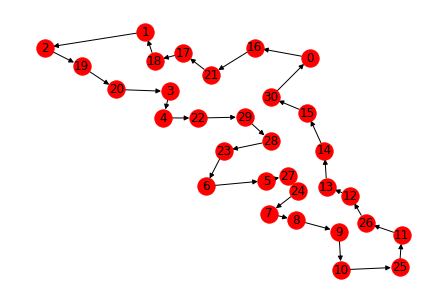

In [9]:
# get the solution and draw it
tour_edges = [ (i,j) for i in range(n) for j in range(n) for t in range(n) if x[i,j,t].x > 0.5 ]
print(tour_edges)
nx.draw(G.edge_subgraph(tour_edges), pos=my_pos, with_labels = True, node_color='red')  # with_labels = True kaldırıldı

In [10]:
import matplotlib.pyplot as plt


In [11]:
from mpl_toolkits.basemap import Basemap as Basemap

import numpy as np

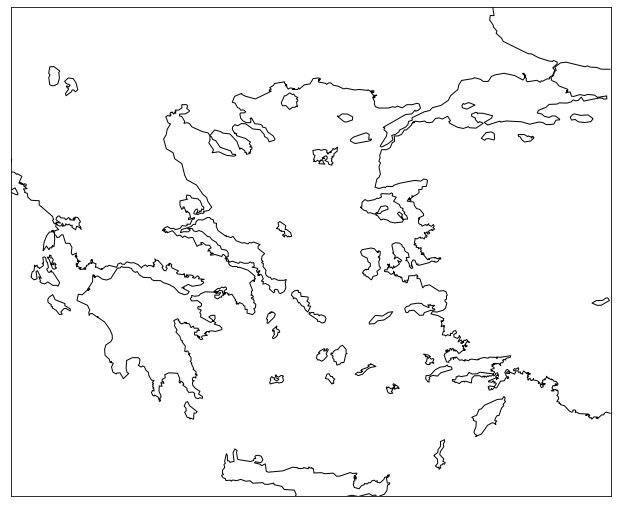

In [12]:
fig = plt.figure(figsize=(12,9))
m = Basemap(projection='mill',
           llcrnrlat = 35,
           urcrnrlat = 42,
           llcrnrlon = 20,
           urcrnrlon = 30,
           resolution = 'i')
m.drawcoastlines()
#m.bluemarble()
#m.shadedrelief()
#m.drawparallels(np.arange(35,42,1))
#m.drawmeridians(np.arange(20,30,1))
plt.show()

In [13]:
import folium
from geopy.geocoders import Nominatim

ModuleNotFoundError: No module named 'folium'